# **Maestría en Inteligencia Artificial Aplicada**

# Análisis PCA

*Materia: Ciencia y Analítica de Datos*

*Profesor: María de la Paz Rico Fernández*

*A01793499 Diego Fernando Guerra Burgos*

01 de Noviembre 2022

Primero cargamos las bibliotecas necesarias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

1. Descarga los datosEnlaces a un sitio externo. y carga el dataset en tu libreta. Descripción aquí. 

Cargamos la Base de Datos para el ejercicio y le damos nombre a las columnas

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv')
column_names = ['ID','credit_given', 'gender', 'education', 'marital_status', 'age', 'payment_status_sep_05', 'payment_status_aug_05',
                'payment_status_jul_05', 'payment_status_jun_05', 'payment_status_may_05', 'payment_status_apr_05', 'bill_statement_sep_05',
                'bill_statement_aug_05', 'bill_statement_jul_05', 'bill_statement_jun_05', 'bill_statement_may_05', 'bill_statement_apr_05',
                'previous_statement_sep_05', 'previous_statement_aug_05', 'previous_statement_jul_05', 'previous_statement_jun_05', 'previous_statement_may_05',
                'previous_statement_apr_05', 'default']
df.columns = column_names
df.head()

,ID,credit_given,gender,education,marital_status,age,payment_status_sep_05,payment_status_aug_05,payment_status_jul_05,payment_status_jun_05,...,bill_statement_jun_05,bill_statement_may_05,bill_statement_apr_05,previous_statement_sep_05,previous_statement_aug_05,previous_statement_jul_05,previous_statement_jun_05,previous_statement_may_05,previous_statement_apr_05,default
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


2. Obten la información del DataFrame con los métodos y propiedades: shape, columns, head(), dtypes, info(), isna()

In [12]:
print ('La base de datos tiene ', df.shape[0], 'filas y ', df.shape[1], 'columnas')

La base de datos tiene  30000 filas y  25 columnas


In [13]:
df.dtypes
#Todas las variables son float, incluso las categóricas

ID                             int64
credit_given                   int64
gender                       float64
education                    float64
marital_status               float64
age                          float64
payment_status_sep_05        float64
payment_status_aug_05        float64
payment_status_jul_05        float64
payment_status_jun_05        float64
payment_status_may_05        float64
payment_status_apr_05        float64
bill_statement_sep_05        float64
bill_statement_aug_05        float64
bill_statement_jul_05        float64
bill_statement_jun_05        float64
bill_statement_may_05        float64
bill_statement_apr_05        float64
previous_statement_sep_05    float64
previous_statement_aug_05    float64
previous_statement_jul_05    float64
previous_statement_jun_05    float64
previous_statement_may_05    float64
previous_statement_apr_05    float64
default                      float64
dtype: object

In [14]:
df.info()
#Existe la presencia de valores NA, vamos con el método isna para determinar su valor 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         30000 non-null  int64  
 1   credit_given               30000 non-null  int64  
 2   gender                     29999 non-null  float64
 3   education                  29998 non-null  float64
 4   marital_status             29998 non-null  float64
 5   age                        29995 non-null  float64
 6   payment_status_sep_05      29997 non-null  float64
 7   payment_status_aug_05      29995 non-null  float64
 8   payment_status_jul_05      29993 non-null  float64
 9   payment_status_jun_05      29991 non-null  float64
 10  payment_status_may_05      29984 non-null  float64
 11  payment_status_apr_05      29986 non-null  float64
 12  bill_statement_sep_05      29989 non-null  float64
 13  bill_statement_aug_05      29989 non-null  flo

In [16]:
df.isna().sum()
#aqui podemos observar todos los valores NA que existen por cada columna

ID                            0
credit_given                  0
gender                        1
education                     2
marital_status                2
age                           5
payment_status_sep_05         3
payment_status_aug_05         5
payment_status_jul_05         7
payment_status_jun_05         9
payment_status_may_05        16
payment_status_apr_05        14
bill_statement_sep_05        11
bill_statement_aug_05        11
bill_statement_jul_05        13
bill_statement_jun_05        15
bill_statement_may_05        17
bill_statement_apr_05        10
previous_statement_sep_05     8
previous_statement_aug_05     9
previous_statement_jul_05     8
previous_statement_jun_05    11
previous_statement_may_05    11
previous_statement_apr_05     5
default                       3
dtype: int64

3. Limpia los datos eliminando los registros nulos o rellena con la media de la columna

In [23]:
payment_status_columns = [string for string in column_names if 'payment_status' in string]
categorical_columns = ['gender', 'education', 'marital_status', 'default']
categorical_columns = categorical_columns + payment_status_columns
clean_df = df.copy()
clean_df.dropna(subset = categorical_columns, inplace = True)
clean_df.dropna(subset= payment_status_columns, inplace = True)
print (df.shape[0] - clean_df.shape[0], 'filas han sido eliminadas por NA en variables categóricas')
filas_iniciales = clean_df.shape[0]

clean_df = clean_df[(clean_df['gender'] == 1) | (clean_df['gender'] == 2)]


clean_df = clean_df[(clean_df['education'] == 1) | (clean_df['education'] == 2)| (clean_df['education'] == 3) | (clean_df['education'] == 4)]


clean_df = clean_df[(clean_df['marital_status'] == 1) | (clean_df['marital_status'] == 2) | (clean_df['marital_status'] == 3)]


clean_df = clean_df[(clean_df['default'] == 1) | (clean_df['default'] == 0)]

filas_finales = clean_df.shape[0]
print ('Se eliminó', filas_iniciales-filas_finales, 'registros que contenían formatos incorrectos de variables categóricas')

#Imputando la media en los valores NA de age
clean_df['age'].fillna(value = clean_df.age.mean(), inplace = True)

if clean_df.age.isna().any() == False:
    print ('No hay valores NA en la columna age porque fueron reemplazados por la media')
else:
    print ('fill NA con media de age no funcionó')


clean_df = clean_df.astype({'age':'int'})

filas_iniciales = clean_df.shape[0]

clean_df.dropna(thresh=9, inplace = True)
filas_finales = clean_df.shape[0]
print ('Se eliminó', filas_iniciales-filas_finales, 'registros')

filas_iniciales = clean_df.shape[0]
clean_df.dropna(inplace = True)
filas_finales = clean_df.shape[0]
print ('Se eliminó', filas_iniciales-filas_finales, 'registros de NA en columnas de statement')

print('Se eliminaron', df.shape[0] - clean_df.shape[0], 'registros en el proceso de limpieza de datos')

25 filas han sido eliminadas por NA en variables categóricas
Se eliminó 399 registros que contenían formatos incorrectos de variables categóricas
No hay valores NA en la columna age porque fueron reemplazados por la media
Se eliminó 0 registros
Se eliminó 14 registros de NA en columnas de statement
Se eliminaron 438 registros en el proceso de limpieza de datos


4. Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión

In [18]:
df.describe()

,ID,credit_given,gender,education,marital_status,age,payment_status_sep_05,payment_status_aug_05,payment_status_jul_05,payment_status_jun_05,...,bill_statement_jun_05,bill_statement_may_05,bill_statement_apr_05,previous_statement_sep_05,previous_statement_aug_05,previous_statement_jul_05,previous_statement_jun_05,previous_statement_may_05,previous_statement_apr_05,default
count,30000.000000,30000.000000,29999.000000,29998.000000,29998.000000,29995.000000,29997.000000,29995.000000,29993.000000,29991.000000,...,29985.000000,29983.000000,29990.000000,29992.000000,2.999100e+04,29992.000000,29989.000000,29989.000000,29995.000000,29997.000000
mean,15000.500000,167484.322667,1.603753,1.853057,1.551903,35.484214,-0.016635,-0.133689,-0.166405,-0.220800,...,43275.652326,40324.493980,38881.135745,5662.945886,5.922489e+03,5225.623400,4827.252526,4800.297209,5216.259977,0.221189
std,8660.398374,129747.661567,0.489125,0.790320,0.521968,9.218024,1.123829,1.197254,1.196048,1.169153,...,64345.500073,60809.984983,59561.312967,16564.165089,2.304418e+04,17608.422625,15668.751975,15280.842069,17778.848359,0.415054
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2329.000000,1763.500000,1256.250000,1000.000000,8.355000e+02,390.000000,296.000000,251.000000,118.000000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18107.000000,17081.000000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54560.000000,50213.000000,49208.250000,5006.000000,5.000000e+03,4505.500000,4014.000000,4033.000000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


Las medidas de tendencia central nos pueden mostrar el comportamiento de la variable que estamos observando. Podemos ver que rango tienen los datos, cual es el promedio, la mediana los cuartiles, etc. Nos ayuda a conocer la distribución de nuestros datos de manera resumida y también conocer a simple vista el valor de los valores atípicos.

5.Realiza el conteo de las variables categóricas

In [66]:
#Utilizamos el Data Frame limpio para contar las variables categoricas
categorical_df = clean_df [categorical_columns]
categorical_df.count()
print ('Las variables categóricas tienen ', categorical_df.shape[0], 'filas y ', categorical_df.shape[1], 'columnas.')
print ('Existen', categorical_df.nunique().sum(), 'categorías en total en nuestra variables categóricas')

Las variables categóricas tienen  29562 filas y  10 columnas.
Existen 75 categorías en total en nuestra variables categóricas


6. Escala los datos, si consideras necesario



In [20]:
numerical_variables = ['credit_given', 'age', 'bill_statement_sep_05', 'bill_statement_aug_05', 'bill_statement_jul_05',
                       'bill_statement_jun_05', 'bill_statement_may_05', 'bill_statement_apr_05', 'previous_statement_sep_05',
                       'previous_statement_aug_05', 'previous_statement_jul_05', 'previous_statement_jun_05',
                       'previous_statement_may_05', 'previous_statement_apr_05']
ndf = clean_df[numerical_variables]
ndf.head()

scaler = StandardScaler()
ndf_scaled = scaler.fit_transform(ndf)
ndf_scaled = pd.DataFrame(ndf_scaled)
ndf_scaled.columns = numerical_variables
ndf_scaled.head() #asegurarnos que los datos se encuentran en la misma escala

,credit_given,age,bill_statement_sep_05,bill_statement_aug_05,bill_statement_jul_05,bill_statement_jun_05,bill_statement_may_05,bill_statement_apr_05,previous_statement_sep_05,previous_statement_aug_05,previous_statement_jul_05,previous_statement_jun_05,previous_statement_may_05,previous_statement_apr_05
0,-1.136185,-1.244646,-0.641186,-0.646310,-0.667078,-0.671676,-0.662864,-0.652872,-0.340993,-0.225545,-0.295706,-0.307416,-0.314595,-0.293571
1,-0.366612,-1.027466,-0.657956,-0.665716,-0.638260,-0.620731,-0.605969,-0.598108,-0.340993,-0.212084,-0.238858,-0.243805,-0.314595,-0.180371
2,-0.597484,-0.158748,-0.296171,-0.492347,-0.480980,-0.448543,-0.416711,-0.391746,-0.249420,-0.190442,-0.238858,-0.243805,-0.249035,-0.010572
3,-0.905313,0.167021,-0.054350,-0.010291,0.035699,-0.230830,-0.185988,-0.156666,-0.220344,-0.167978,-0.227489,-0.237444,-0.244511,-0.236971
4,-0.905313,2.338815,-0.577104,-0.610120,-0.158872,-0.345642,-0.347581,-0.331590,-0.220344,1.332317,0.272771,0.265085,-0.269424,-0.255140


7. Reduce las dimensiones con PCA, si consideras necesario.



1.   Indica la varianza de los datos explicada por cada componente seleccionado. Para actividades de exploración de los datos la varianza > 70%
2.   Indica la importancia de las variables en cada componente



Creamos la matriz de correlación de las variables numéricas.

In [ ]:
corr = ndf.corr()
corr

#al observar la tabla de correlación observamos que las variables con alta correlación son aquellas que miden el valor a pagar de cada mes (bill_statement).

,credit_given,age,bill_statement_sep_05,bill_statement_aug_05,bill_statement_jul_05,bill_statement_jun_05,bill_statement_may_05,bill_statement_apr_05,previous_statement_sep_05,previous_statement_aug_05,previous_statement_jul_05,previous_statement_jun_05,previous_statement_may_05,previous_statement_apr_05
credit_given,1.000000,0.143990,0.283827,0.276806,0.281890,0.293582,0.295407,0.289811,0.195714,0.177637,0.210485,0.203250,0.217229,0.219678
age,0.143990,1.000000,0.054824,0.052571,0.052040,0.050013,0.048493,0.046913,0.025272,0.022436,0.029491,0.021525,0.021462,0.019194
bill_statement_sep_05,0.283827,0.054824,1.000000,0.951257,0.891872,0.861223,0.831398,0.804824,0.140465,0.098901,0.156787,0.157609,0.165013,0.175750
bill_statement_aug_05,0.276806,0.052571,0.951257,1.000000,0.927784,0.893396,0.861450,0.833826,0.280899,0.100566,0.151006,0.146450,0.155415,0.170668
bill_statement_jul_05,0.281890,0.052040,0.891872,0.927784,1.000000,0.925081,0.885658,0.855556,0.244575,0.318034,0.131078,0.142440,0.177523,0.179497
bill_statement_jun_05,0.293582,0.050013,0.861223,0.893396,0.925081,1.000000,0.940461,0.902335,0.233243,0.208149,0.300246,0.128986,0.159990,0.175025
bill_statement_may_05,0.295407,0.048493,0.831398,0.861450,0.885658,0.940461,1.000000,0.947199,0.218743,0.181957,0.252505,0.293202,0.140840,0.162031
bill_statement_apr_05,0.289811,0.046913,0.804824,0.833826,0.855556,0.902335,0.947199,1.000000,0.202056,0.173798,0.234570,0.250145,0.307474,0.115464
previous_statement_sep_05,0.195714,0.025272,0.140465,0.280899,0.244575,0.233243,0.218743,0.202056,1.000000,0.286749,0.253667,0.200101,0.149734,0.186267
previous_statement_aug_05,0.177637,0.022436,0.098901,0.100566,0.318034,0.208149,0.181957,0.173798,0.286749,1.000000,0.246064,0.179580,0.182268,0.157735


Ejecutamos el código para realizar PCA 

In [21]:
pcs = PCA()
pcs_t = pcs.fit_transform(ndf_scaled)

Aquí observamos la proporción de la varianza acumulada de cada componente que arroja el PCA. Para esto guardamos la info del PCA en un nuevo data frame.

In [22]:
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })
pcsSummary_df = pcsSummary_df.transpose()

pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)


pcsSummary_df
#Aquí podemos observar la varianza explicada por cada componente y la varianza acumulada. Para este caso vamos a seleccionar 8 componentes principales que explican aproximadamente 90% de la varianza de los datos.

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Standard deviation,2.433541,1.311636,1.022214,0.961932,0.940136,0.934306,0.882595,0.851804,0.840562,0.510774,0.265159,0.201322,0.157633,0.152563
Proportion of variance,0.422994,0.122881,0.074635,0.066092,0.063130,0.062350,0.055639,0.051825,0.050466,0.018634,0.005022,0.002895,0.001775,0.001662
Cumulative proportion,0.422994,0.545875,0.620510,0.686602,0.749732,0.812082,0.867721,0.919546,0.970011,0.988646,0.993668,0.996563,0.998338,1.000000


In [29]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(),
                                columns = pcsSummary_df.columns,
                                index = ndf_scaled.columns
                                )
pcsComponents_df
#En esta tabla se detalla la importancia de cada variable en los 8 componentes principales que hemos elegido.

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
credit_given,0.164887,0.301311,-0.378848,-0.206555,0.029399,-0.075987,0.123414,-0.068554,-0.817403,-0.028547,-0.005240,0.016185,-0.000847,0.003258
age,0.032019,0.072607,-0.870154,0.338118,-0.029995,0.073694,-0.085426,0.032390,0.327810,-0.008415,-0.000561,-0.001334,0.000353,0.001027
bill_statement_sep_05,0.372354,-0.191318,-0.034632,-0.065578,0.037624,-0.042925,0.009461,0.009785,0.011041,0.570042,0.416460,-0.432992,-0.204729,-0.296481
bill_statement_aug_05,0.383187,-0.175036,-0.001790,0.005304,0.081286,-0.031327,-0.029709,-0.136333,0.020460,0.386878,0.034243,0.358710,0.378422,0.610163
bill_statement_jul_05,0.388269,-0.126694,0.035205,0.059962,0.116337,0.094366,-0.123446,0.091358,-0.024069,0.118441,-0.490964,0.484507,-0.139262,-0.522056
bill_statement_jun_05,0.391638,-0.120183,0.032786,0.073238,0.031005,0.016421,0.125385,0.041213,0.018549,-0.205890,-0.518705,-0.498729,-0.318589,0.380878
bill_statement_may_05,0.388765,-0.105261,0.031671,0.039711,-0.105893,-0.098388,-0.007705,0.050439,0.022411,-0.419834,0.076144,-0.239800,0.699704,-0.286450
bill_statement_apr_05,0.381166,-0.092824,0.018138,-0.067159,-0.162494,0.072370,0.004759,0.001967,0.060495,-0.487755,0.510344,0.335392,-0.428342,0.107745
previous_statement_sep_05,0.135543,0.383289,0.174788,0.355370,0.231470,0.022529,-0.194463,-0.751790,0.037693,-0.055067,0.047078,-0.070901,-0.051897,-0.079993
previous_statement_aug_05,0.116981,0.407787,0.201367,0.350815,0.164062,0.394481,-0.293396,0.568299,-0.134455,0.052657,0.148837,-0.065800,0.050611,0.122210


In [30]:
pcs_df = pd.DataFrame(pcs_t, columns = pcsSummary_df.columns)
comps_df = pd.DataFrame(pcs.components_.round(4), columns = pcs_df.columns,
                        index = ndf_scaled.columns) 

comps_df.iloc[:,:8].abs().idxmax()

#Aqui podemos que variable es la que más explica en cada componente principal que observamos
#En el primer componente es la variable 'previous_statement_sep_05'

PC1    previous_statement_sep_05
PC2        bill_statement_sep_05
PC3    previous_statement_aug_05
PC4    previous_statement_apr_05
PC5    previous_statement_apr_05
PC6    previous_statement_jul_05
PC7    previous_statement_may_05
PC8    previous_statement_jul_05
dtype: object

8. Elabora los histogramas de los atributos para visualizar su distribución

Realizamos un scree plot para observar esta tabla en gráfico y poder ver los atributos

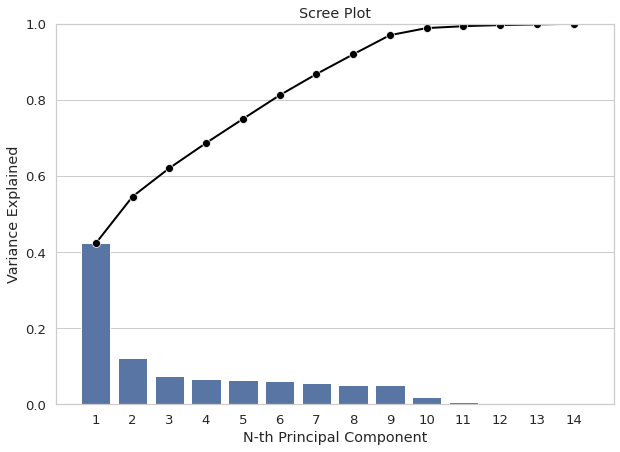

In [ ]:
PC_components = np.arange(pcs.n_components_) + 1

_ = sns.set(style = 'whitegrid',
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components,
                y = pcs.explained_variance_ratio_,
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1,
                 y = np.cumsum(pcs.explained_variance_ratio_),
                 color = 'black',
                 linestyle = '-',
                 linewidth = 2,
                 marker = 'o',
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N Componente Principal')
plt.ylabel('Varianza Explicada')
plt.ylim(0, 1)
plt.show()

9. Realiza la visualización de los datos usando por lo menos 3 gráficos que consideres adecuados: plot, scatter, jointplot, boxplot, areaplot, pie chart, pairplot, bar chart, etc.




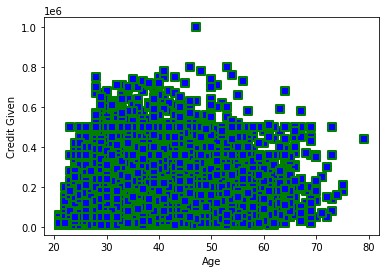

In [34]:
# En primer lugar vamos a observar scatter plot para ver que tan relacionadas estan las variables
#Observermos como afecta la edad del solicitante a la cantidad de credito 

x = clean_df['age']
y = clean_df['credit_given']

plt.scatter(x, y, c ="blue",
            linewidths = 2,
            marker ="s",
            edgecolor ="green",
            s = 50)
plt.xlabel("Age")
plt.ylabel("Credit Given")

plt.show()

#En este gráfico no encontramos una relación aparente entre la edad y el crédito que recibe una persona solicitante

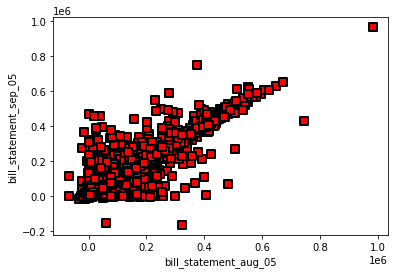

In [37]:
#Repetimos este gráfico para observar algunas variables que tienen alta correlación. 

x = clean_df['bill_statement_aug_05']
y = clean_df['bill_statement_sep_05']

plt.scatter(x, y, c ="red",
            linewidths = 2,
            marker ="s",
            edgecolor ="black",
            s = 50)
plt.xlabel("bill_statement_aug_05")
plt.ylabel("bill_statement_sep_05")

plt.show()

#Estas variables tienen una alta correlación y en la gráfica se puede observar esto.

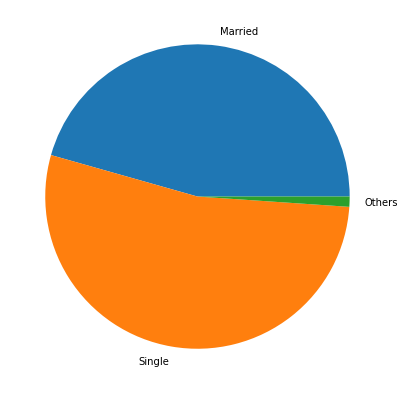

In [49]:
#veamos los créditos otorgados en relación al estado marital de los solicitantes.
df_married = df[df['marital_status'] == 1]
df_single = df[df['marital_status'] == 2]
df_other = df[df['marital_status'] == 3]

marital_status = ['Married', 'Single', 'Others']
 
data = [df_married.shape[0], df_single.shape[0], df_other.shape[0]]
 
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = marital_status)
 
plt.show()



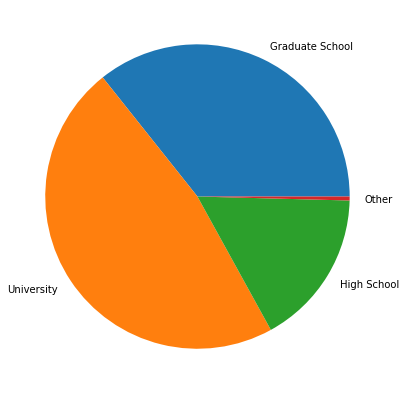

In [50]:
#Observemos también la distribución de clientes en base a su educación

df_grad = df[df['education'] == 1]
df_uni = df[df['education'] == 2]
df_hs = df[df['education'] == 3]
df_edu_others = df[df['education'] == 4] 

education_status = ['Graduate School', 'University', 'High School', 'Other']
 
data = [df_grad.shape[0], df_uni.shape[0], df_hs.shape[0], df_edu_others.shape[0]]
 
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = education_status)
 
plt.show()

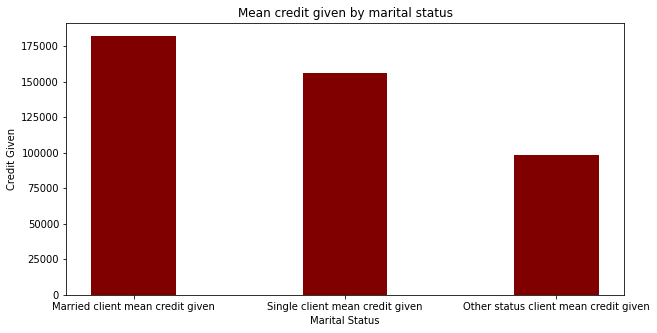

In [53]:
#Observemos el crédito promedio otorgado por cada estado de relación marital
credit_mean_married = df_married['credit_given'].mean()

credit_mean_single = df_single['credit_given'].mean()

credit_mean_other = df_other['credit_given'].mean()

data = {'Married client':credit_mean_married, 'Single client':credit_mean_single, 
        'Other status client':credit_mean_other}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Marital Status")
plt.ylabel("Credit Given (mean)")
plt.title("Mean credit given by marital status")
plt.show()

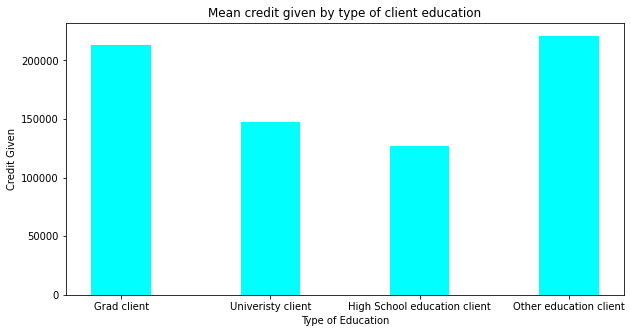

In [56]:
#Observemos el crédito promedio otorgado por cada estado de relación marital
credit_mean_grad = df_grad['credit_given'].mean()

credit_mean_uni = df_uni['credit_given'].mean()

credit_mean_hs = df_hs['credit_given'].mean()

credit_mean_edu_other = df_edu_others['credit_given'].mean()

data = {'Grad client':credit_mean_grad, 'Univeristy client':credit_mean_uni, 
        'High School education client':credit_mean_hs, 'Other education client':credit_mean_edu_other}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(courses, values, color ='cyan',
        width = 0.4)
 
plt.xlabel("Type of Education")
plt.ylabel("Credit Given")
plt.title("Mean credit given by type of client education")
plt.show()

10. Interpreta y explica cada uno de los gráficos indicando cuál es la información más relevante que podría ayudar en el proceso de toma de decisiones.



1.   En el primer gráfico observamos la relación entre Edad y Cantidad de Crédito otorgado. Una posible suposición de los datos es que mientras mayor edad tienen nuestros clientes podría reducirse la cantidad de crédito, por ejemplo, si un cliente tiene 70 años es muy díficil que se decida entregarle un crédito a largo plazo. En este caso vemos que no existe una relación observable entre estas variables. Esto nos indica que la edad no podría afectar la cantida de crédito que se recibe, sino que depende de otros factores o condiciones del cliente. 
En el segundo gráfico de correlación colocamos la variable del estado de cuenta del mes de agosto con el mes de septiembre. En este caso vemos una alta correlación lo que nos indica que el estado de cuenta de cliente no muestra variación de un mes al otro, es decir los clientes mantienen un comportamiento de consumo similar en meses seguidos. En raras ocasiones un cliente logrará reducir el valor de su estado de cuenta, lo que nos indica la capacidad de gasto que tienen los clientes cada mes al observar su estado de cuenta.  Para nuestro PCA esto es importante porque tenemos 6 variables de este tipo que tienen alta correlación y podríamos reducir la dimensionalidad de modelo con este tipo de análisis. 
2.   En los segundos gráficos que nos describen la composición de nuestros clientes en relación a su estado marital y la educación que han recibido. Podemos ver que nuestros clientes por lo general se componen de igual manera en cuanto a su relación marital, es decir, nuestro cliente tiene aproximadamente un 50% de probabilidad de estar casado o soltero. Mientras que si observamos la cantidad de clientes separados por el tipo de educación que recibieron notamos que la gran mayoría son graduados de la universidad (título de tercer nivel). Esta información puede ser complementada con otras variables para determinar el target poblacional de nuestro banco, nos puede dar una idea general de que tipo de clientes prefieren nuestro banco, en este caso personas graduadas de la universidad pero si juntamos con ingreso promedio a sus cuentas bancarias, podríamos determinar que son clientes de clase alta (altos niveles de ingreso) y así tener una idea sobre nuestros clientes.
3. Por último, observamos el crédito promedio entregado a nuestros clientes con esta misma clasificación. Observamos que por estado marital, en promedio, se otorga una mayor cantidad de crédito a las personas casadas, lo cual tiene sentido por la composición familiar y su estructura de gastos/ingresos. Lo interesante es en la segunda gráfica que observamos que los clientes que reciben otro tipo de educación son los que reciben, en promedio, mayor crédito. Esto puede deberse a que es una población menor que las otras categorías. Sin embargo también podría ser un indicativo de que estas personas reciben mayores créditos porque son emprendedores y se dedicaron a construir su negocio dejando de lado el estudio, por lo cual pueden percibir mejores ingresos. Sobre esto se puede realizar otro estudio complementario para determinar la razón y conocer más sobre este segmento que puede parecer pequeño, pero puede mostrar mayor rentabilidad que en otras categorías. 

